In [2]:
#sparse version for N>10
import scipy
import scipy.sparse.linalg
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt


sz=1/2*sp.csr_matrix([[1,0],[0,-1]])
sx=1/2*sp.csr_matrix([[0,1],[1,0]])
sy=1/2*sp.csr_matrix([[0,-1j],[1j,0]])
I=sp.csr_matrix([[1,0],[0,1]])

def one_spin(spin,num_site,tot_site):
    #one_spin operator for spin1
    one_spin_list=[I]*tot_site
    one_spin_list[num_site-1]=spin 
    result1=one_spin_list[0]
    for i in range(tot_site-1):
        result1=sp.kron(result1,one_spin_list[i+1],format='csr')
    return result1

def two_spin(spin,num_site,tot_site):
    #two_spin operator for spin2
    two_spin_list=[I]*tot_site
    two_spin_list[num_site-1]=spin    
    if num_site==tot_site: #PBC for last site  
        two_spin_list[0]=spin
        result2=two_spin_list[1]   
        for i in range(1,tot_site-1): #where to start to product for pbc????
            result2=sp.kron(result2,two_spin_list[i+1],format='csr')
        result2=sp.kron(two_spin_list[0],result2,format='csr')  
    else: 
        two_spin_list[num_site]=spin
        result2=two_spin_list[0]
        for i in range(tot_site-1):
            result2=sp.kron(result2,two_spin_list[i+1],format='csr')
    return result2

def H_one_spin_tot(spin,tot_site): 
    H_tot=0
    for i in range(tot_site):
        H_tot+=one_spin(spin,i,tot_site)
    return H_tot

def H_two_spin_tot(spin,tot_site): 
    H_tot=0
    for i in range(tot_site):
        H_tot+=two_spin(spin,i,tot_site)
    return H_tot

#Hamitonian
def H(j,hz,hx,N):
    H=-j*H_two_spin_tot(sx,N)-hz*H_one_spin_tot(sz,N)-hx*H_one_spin_tot(sx,N)
    return H

#no imagnary field
hx=0

# cutting wavegunction at the middle point
# then plot entropy vs log(N)
# trying to plot the figrue not at the critical point

Text(0.5, 1.0, 'S vs log(N)')

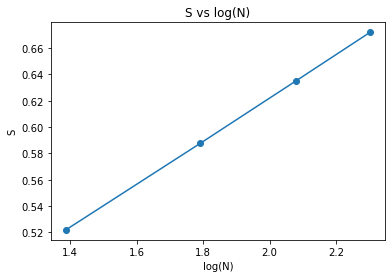

In [3]:
#critical point j/hz=2
j=1
hz=0.5
N_list=[4,6,8,10]
logN=[]
entropy_list=[]

for N in N_list:
    logN.append(np.log(N))
    
    Ham=H(j,hz,hx,N)
    w,v=sp.linalg.eigs(Ham,k=1,which='SR',tol=10**-8)
    v=v.reshape(2**(N//2),2**(N//2)) #cutting wavefunction at the middle point
    u, s, vh = np.linalg.svd(v)
    
    entropy=0
    for singular in s:
        entropy+=singular**2*(np.log(singular**2))
    entropy_list.append(-1*entropy)
    
        
plt.plot(logN,entropy_list,'o-')        
plt.xlabel('log(N)')
plt.ylabel('S')
plt.title("S vs log(N)")

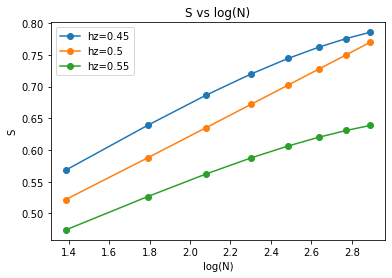

In [74]:
#critical point j/hz=2
j=1
hz_list=[0.45,0.5,0.55]
N_list=[4,6,8,10,12,14,16,18]


for hz in hz_list:
    logN=[]
    entropy_list=[]
    for N in N_list:
        logN.append(np.log(N))
        
        Ham=H(j,hz,hx,N)
        w,v=sp.linalg.eigs(Ham,k=1,which='SR',tol=10**-6)
        v=v.reshape(2**(N//2),2**(N//2)) #cutting wavefunction at the middle point
        u, s, vh = np.linalg.svd(v)

        entropy=0
        for singular in s:
            entropy+=singular**2*(np.log(singular**2))
        entropy_list.append(-1*entropy)
        
    plt.plot(logN,entropy_list,'o-',label='hz=%s' %(hz))        
        

plt.xlabel('log(N)')
plt.ylabel('S')
plt.title("S vs log(N)")
plt.legend()

# comparing different values which not at critical point

# entropy vs cutting position

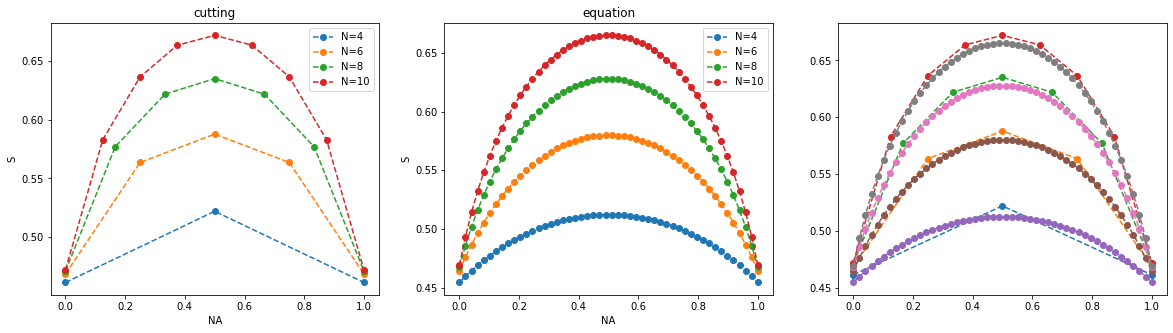

In [5]:
#critical point j/hz=2
j=1
hz=0.5
N_list=[4,6,8,10]
fig,ax = plt.subplots(1,3,figsize=(20,5))

#cutting method
for N in N_list:        
    Ham=H(j,hz,hx,N)
    w,v=sp.linalg.eigs(Ham,k=1,which='SR',tol=10**-8)
       
    entropy_list=[]
    for dummy in range(N-1):
        NA=dummy+1
        NB=N-NA
        v=v.reshape(2**(NA),2**(NB))
        u, s, vh = np.linalg.svd(v)

        entropy=0
        for singular in s:
            entropy+=singular**2*(np.log(singular**2))
        entropy_list.append(-1*entropy)            
    ax[0].plot(np.linspace(0,1,N-1),entropy_list,'o--',label='N=%s' %(N))
    ax[2].plot(np.linspace(0,1,N-1),entropy_list,'o--',label='N=%s' %(N))


#equation method for checking
#eq has to be shifted by a constant
constant=entropy_list[0]
mesh=50
for N in N_list:
    entropy_list=[]
    NA_list=np.linspace(1,N-1,mesh)
    for NA in NA_list:
        NB=N-NA
        c=1/2
        entropy=c/3*np.log(N*np.sin(np.pi*NA/N)/np.pi)
        entropy_list.append(entropy)
    ax[1].plot(np.linspace(0,1,50),entropy_list+constant,'o--',label='N=%s' %(N)) 
    ax[2].plot(np.linspace(0,1,50),entropy_list+constant,'o--',label='N=%s' %(N))
    

ax[0].set_title('cutting')    
ax[0].set_xlabel('NA')
ax[0].set_ylabel('S')
ax[0].legend()

ax[1].set_title('equation')
ax[1].set_xlabel('NA')
ax[1].set_ylabel('S')
ax[1].legend()

# eq for denser point

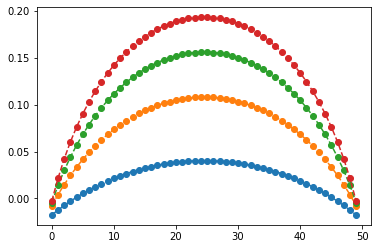

In [58]:
j=1
hz=0.5
N_list=[4,6,8,10]
mesh=50
#equation method for checking
for N in N_list:
    entropy_list=[]
    NA_list=np.linspace(1,N-1,mesh)
    for NA in NA_list:
        NB=N-NA
        c=1/2
        entropy=c/3*np.log(N*np.sin(np.pi*NA/N)/np.pi)
        entropy_list.append(entropy)
    plt.plot(np.arange(mesh),entropy_list,'o--',label='N=%s' %(N)) 
       